In [12]:
import numpy as np
import scipy.stats as stats
from scipy import signal
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.gridspec as gridspec 
from mpl_toolkits.axes_grid1 import make_axes_locatable

# 1. One dimension FFT: basics

### 1.1 Simple sine and cosine waves

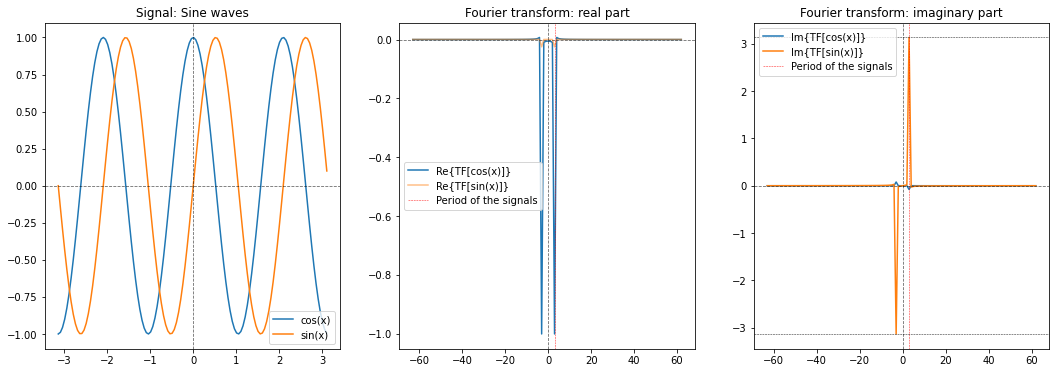

In [13]:
plt.figure(figsize=(6*3, 2*3), constrained_layout=False)

# Points Real space (Npoint = 126)
x = np.arange(-np.pi, np.pi, 0.05)
# Points Fourier space
x_f = np.arange(0, np.shape(x)[0], 1) - np.shape(x)[0]/2

# Creating the cos and sin waves: 
# Amplitude 1, Phase 0, Periode 3
T = 3
cosT = np.cos(x*T) 
sinT = np.sin(x*T)
plt.subplot(131)
plt.plot(x, cosT, label="cos(x)")
plt.plot(x, sinT, label="sin(x)")
plt.title('Signal: Sine waves')
plt.legend()
plt.axhline(y=0, color='k', ls = '--', lw=0.8, alpha=0.6)
plt.axvline(x=0, color='k', ls = '--', lw=0.8, alpha=0.6)

# Fourier transform of the cos and sin waves: 
TF_cosT =np.fft.fftshift(np.fft.fft(cosT))
TF_sinT =np.fft.fftshift(np.fft.fft(sinT))

# Plot Amplitude (normalized)
plt.subplot(132)
plt.plot(x_f,np.real(TF_cosT)/(np.shape(x)[0]/2), label="Re{TF[cos(x)]}")
plt.plot(x_f,np.real(TF_sinT)/(np.shape(x)[0]/2), label="Re{TF[sin(x)]}", alpha = 0.5)
plt.axvline(x=T, color='r', ls = '--', lw=0.5, alpha=0.9, label = "Period of the signals")
plt.title('Fourier transform: real part')
plt.legend()
plt.axhline(y=0, color='k', ls = '--', lw=0.8, alpha=0.6)
plt.axvline(x=0, color='k', ls = '--', lw=0.8, alpha=0.6)

# Plot Phase
plt.subplot(133) 
plt.plot(x_f,np.imag(TF_cosT)/(np.shape(x)[0]/2)*np.pi, label="Im{TF[cos(x)]}")
plt.plot(x_f,np.imag(TF_sinT)/(np.shape(x)[0]/2)*np.pi, label="Im{TF[sin(x)]}")
plt.axvline(x=T, color='r', ls = '--', lw=0.5, alpha=0.9, label = "Period of the signals")
plt.title('Fourier transform: imaginary part')
plt.legend()
plt.axhline(y=0, color='k', ls = '--', lw=0.8, alpha=0.6)
plt.axvline(x=0, color='k', ls = '--', lw=0.8, alpha=0.6)
plt.axhline(y=np.pi, color='k', ls = '--', lw=0.5, alpha=0.9)
plt.axhline(y=-np.pi, color='k', ls = '--', lw=0.5, alpha=0.9)

plt.show()


**Reminder on complex numbers and numpy syntax:**

If $z$ is a complex number written $z = x + iy$ (with $i^2 = -1$) 

Then np.real(z) = Re{z} = x and np.imag(z) = Im{z} = y

It can also be written $z = |z| e^{i\theta} = |z| cos(\theta) + i |z| sin (\theta) $,

so that $ x = |z| cos(\theta)$ and $ y = |z| sin(\theta)$,

and the relations np.abs(z) $ = |z| = \sqrt{(x^2+y^2)} $ and  np.angle(z) $=\theta = tan^{-1}(y/x)$

*** 
So in our last two cases, |z| = 1, and taking np.abs(s) would render two peaks of height 1. The middle plot shows instead the real part so that the peak heigt is multiplied by $cos(\theta)$ which is either 1 (blue case, cosine wave) or 0 (orange case, sine wave).

And $\theta $ is going from $0$ to $2\pi$, and taking np.angle(s) would render non-sense. Instead taking np.imag(s) tells us about the phase shift from a cosine wave reference, see below.


### 1.2 Changing the phase, amplitude and period

Amplitude =  1.0
Period =  3.0
Phase shift =  0.5
---------------
Min(Re{FT[signal]}): -0.0005756335214481071
Max(Re{FT[signal]}): 0.02484995514124784
Max(Im{FT[signal]}): 3.136095588507669
Ph: 1.0


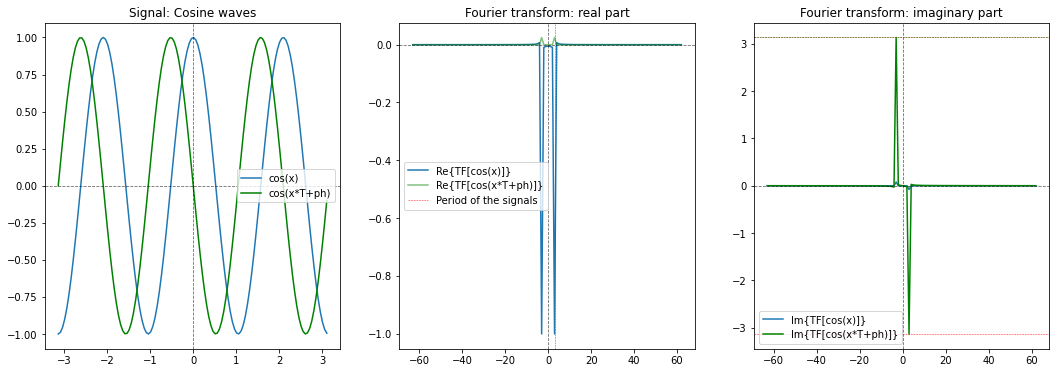

In [14]:
plt.figure(figsize=(6*3, 2*3), constrained_layout=False)

#Parameters for the sine waves
A = 1.  #Amplitude >0.
T  = 3. #Period [1-np.shape(x)]
Ph = 0.5  #Phase [-pi:pi] i.e. facteur [-1,1]
print('Amplitude = ',A)
print('Period = ',T)
print('Phase shift = ', Ph)

#Creating the cosine wave: 
#at a given phase, amplitude and period
cosT = np.cos(x*3) 
cosP = A*np.cos(x*T+Ph*np.pi) 
plt.subplot(131)
plt.plot(x, cosT, label="cos(x)")
plt.plot(x, cosP, color='g', label="cos(x*T+ph)")
plt.title('Signal: Cosine waves')
plt.legend()
plt.axhline(y=0, color='k', ls = '--', lw=0.8, alpha=0.6)
plt.axvline(x=0, color='k', ls = '--', lw=0.8, alpha=0.6)

# Fourier transform of the cos waves: 
TF_cosT =np.fft.fftshift(np.fft.fft(cosT))
TF_cosP =np.fft.fftshift(np.fft.fft(cosP))

# Plot Amplitude (normalized)
plt.subplot(132)
plt.plot(x_f,np.real(TF_cosT)/(np.shape(x)[0]/2), label="Re{TF[cos(x)]}")
plt.plot(x_f,np.real(TF_cosP)/(np.shape(x)[0]/2), label="Re{TF[cos(x*T+ph)]}",color='g', alpha = 0.5)
plt.axvline(x=T, color='r', ls = '--', lw=0.5, alpha=0.9, label = "Period of the signals")
plt.title('Fourier transform: real part')
plt.legend()
plt.axhline(y=0, color='k', ls = '--', lw=0.8, alpha=0.6)
plt.axvline(x=0, color='k', ls = '--', lw=0.8, alpha=0.6)

# Plot Phase
plt.subplot(133) 
plt.plot(x_f,np.imag(TF_cosT)/(np.shape(x)[0]/2)*np.pi, label="Im{TF[cos(x)]}")
plt.plot(x_f,np.imag(TF_cosP)/(np.shape(x)[0]/2)*np.pi, label="Im{TF[cos(x*T+ph)]}", color = 'g')
plt.title('Fourier transform: imaginary part')
plt.axhline(y=0, color='k', ls = '--', lw=0.8, alpha=0.6)
plt.axvline(x=0, color='k', ls = '--', lw=0.8, alpha=0.6)
plt.axhline(y=np.pi, color='r', ls = '--', lw=0.5, alpha=0.9)
plt.axhline(y=-np.pi, color='r', ls = '--', lw=0.5, alpha=0.9)
plt.axhline(y=np.max(np.imag(TF_cosP)/(np.shape(x)[0]/2)*np.pi), color='g', ls = '--', lw=0.5, alpha=0.9)

#Print information:
print('---------------')
print('Min(Re{FT[signal]}):', np.min(np.real(TF_cosP)/(np.shape(x)[0]/2)))
print('Max(Re{FT[signal]}):', np.max(np.real(TF_cosP)/(np.shape(x)[0]/2)))       
print('Max(Im{FT[signal]}):', np.max(np.imag(TF_cosP)/(np.shape(x)[0]/2)*np.pi))

print('Ph:', Ph*2.)

plt.legend()
plt.show()

A few conclusions from here:
- Cosine wave gives the origin for the zero phase (blue)
- Real part of the FT, normalized to sum(signal): (i) peak centered at the period; (ii) height inside [-1,1] linked to phase shift (cosine = 0, sine = -1).
- Imaginary part of the FT: (i) sign gives whether [0,pi] or [-pi,0], that is to say if Ph is negative or positive; (ii) intensity gives the phase shift (cos = 0, sin = pi)

### 1.3 Case of a Dirac-delta (impulse) function

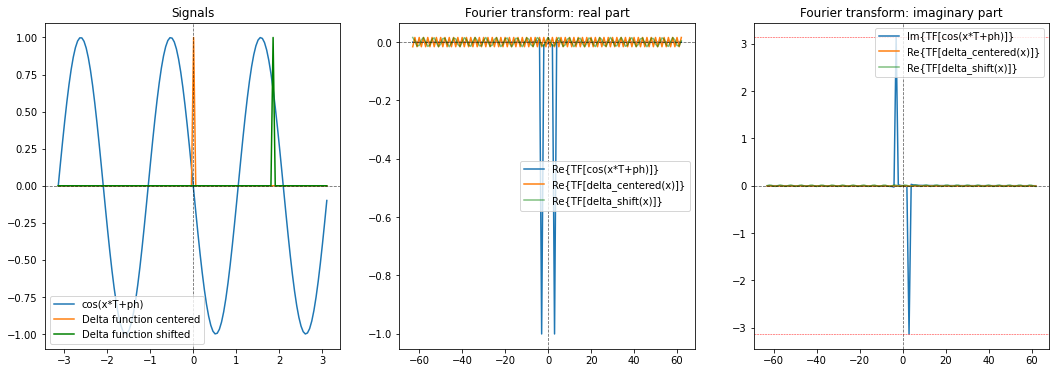

In [15]:
plt.figure(figsize=(6*3, 2*3), constrained_layout=False)

#Parameters for the sine waves
A = 1.  #Amplitude >0.
T  = 3. #Period [1-np.shape(x)]
Ph = 0.5  #Phase [-pi:pi] i.e. facteur [-1,1]

#Creating the cosine wave at a given phase, amplitude and period
cosP = A*np.cos(x*T+Ph*np.pi) 
#Creating a delta function
delta = signal.unit_impulse(np.shape(x),'mid')
delta_shift = signal.unit_impulse(np.shape(x),100)

plt.subplot(131)
plt.plot(x, cosP, label="cos(x*T+ph)")
plt.plot(x, delta, label="Delta function centered")
plt.plot(x, delta_shift, color='g', label="Delta function shifted")
plt.title('Signals')
plt.legend()
plt.axhline(y=0, color='k', ls = '--', lw=0.8, alpha=0.6)
plt.axvline(x=0, color='k', ls = '--', lw=0.8, alpha=0.6)


# Fourier transform of the cos waves: 
TF_cosP =np.fft.fftshift(np.fft.fft(cosP))
TF_delta =np.fft.fftshift(np.fft.fft(delta))
TF_delta_shift =np.fft.fftshift(np.fft.fft(delta_shift))

# Plot Amplitude (normalized)
plt.subplot(132)
plt.plot(x_f,np.real(TF_cosT)/(np.shape(x)[0]/2), label="Re{TF[cos(x*T+ph)]}")
plt.plot(x_f,np.real(TF_delta)/(np.shape(x)[0]/2), label="Re{TF[delta_centered(x)]}")
plt.plot(x_f,np.real(TF_delta_shift)/(np.shape(x)[0]/2), label="Re{TF[delta_shift(x)]}",color='g', alpha = 0.5)
plt.title('Fourier transform: real part')
plt.legend()
plt.axhline(y=0, color='k', ls = '--', lw=0.8, alpha=0.6)
plt.axvline(x=0, color='k', ls = '--', lw=0.8, alpha=0.6)

# Plot Phase
plt.subplot(133) 
plt.plot(x_f,np.imag(TF_cosP)/(np.shape(x)[0]/2)*np.pi, label="Im{TF[cos(x*T+ph)]}")
plt.plot(x_f,np.imag(TF_delta)/(np.shape(x)[0]/2), label="Re{TF[delta_centered(x)]}")
plt.plot(x_f,np.imag(TF_delta_shift)/(np.shape(x)[0]/2), label="Re{TF[delta_shift(x)]}",color='g', alpha = 0.5)
plt.title('Fourier transform: imaginary part')
plt.axhline(y=0, color='k', ls = '--', lw=0.8, alpha=0.6)
plt.axvline(x=0, color='k', ls = '--', lw=0.8, alpha=0.6)
plt.axhline(y=np.pi, color='r', ls = '--', lw=0.5, alpha=0.9)
plt.axhline(y=-np.pi, color='r', ls = '--', lw=0.5, alpha=0.9)
plt.legend()

plt.show()

In [ ]:
plt.figure(figsize=(10*2, 3*2), constrained_layout=False)

plt.subplot(131)
plt.plot(x, cosP, label="cos(x*T+ph)")
plt.plot(x, delta, label="Delta function centered")
plt.plot(x, delta_shift, color='g', label="Delta function shifted")
plt.title('Signals')
plt.legend()
plt.axhline(y=0, color='k', ls = '--', lw=0.8, alpha=0.6)
plt.axvline(x=0, color='k', ls = '--', lw=0.8, alpha=0.6)

# Plot Amplitude (normalized)
plt.subplot(132)
plt.plot(x_f,np.abs(TF_cosT)/(np.shape(x)[0]/2), label="Abs{TF[cos(x*T+ph)]}")
plt.plot(x_f,np.abs(TF_delta)/(np.shape(x)[0]/2), label="Abs{TF[delta_centered(x)]}")
plt.plot(x_f,np.abs(TF_delta_shift)/(np.shape(x)[0]/2), label="Abs{TF[delta_shift(x)]}",color='g', alpha = 0.5)
plt.title('Fourier transform: amplitude')
plt.legend()
plt.axhline(y=0, color='k', ls = '--', lw=0.8, alpha=0.6)
plt.axvline(x=0, color='k', ls = '--', lw=0.8, alpha=0.6)


plt.show()

### 1.4 Case of sum of sine waves

In [ ]:
plt.figure(figsize=(10*2, 3*2), constrained_layout=False)

#Modify only the period, not the amplitude, nor the phase shift (useless)
T = [3,5,8,12,19]
signal = np.sin(x*T[0]) +  np.sin(x*T[1]) + np.sin(x*T[2]) + np.sin(x*T[3]) + np.sin(x*T[4])

#Plot input signal
plt.subplot(121)
plt.plot(x,signal)
plt.title('Signal input')
plt.axhline(y=0, color='k', ls = '--', lw=0.8, alpha=0.6)
plt.axvline(x=0, color='k', ls = '--', lw=0.8, alpha=0.6)

#Plot spectrum signal
TF_signal =np.fft.fftshift(np.fft.fft(signal))
plt.subplot(122)
plt.plot(x_f,np.abs(TF_signal)/(np.shape(x)[0]/2), color = 'orange')
plt.title('Signal spectrum')
plt.axvline(x=T[0], color='r', ls = '--', alpha=0.6)
plt.axvline(x=T[1], color='r', ls = '--', alpha=0.6)
plt.axvline(x=T[2], color='r', ls = '--', alpha=0.6)
plt.axvline(x=T[3], color='r', ls = '--', alpha=0.6)
plt.axvline(x=T[4], color='r', ls = '--', alpha=0.6)
plt.axhline(y=0, color='k', ls = '--', lw=0.8, alpha=0.6)
plt.axvline(x=0, color='k', ls = '--', lw=0.8, alpha=0.6)
plt.show()

### 1.5 Case of random noise

In [ ]:
plt.figure(figsize=(10*2, 3*2), constrained_layout=False)

x = np.arange(-np.pi, np.pi, 0.05)
noise_u = np.random.uniform(-1,1,np.shape(x))
noise_g = np.random.normal(0,1/(np.sqrt(2)),np.shape(x))
TF_nu =np.fft.fftshift(np.fft.fft(noise_u))
TF_ng =np.fft.fftshift(np.fft.fft(noise_g))

plt.subplot(121)
plt.title('Signals: random noise')
plt.plot(x,noise_u, label = 'Uniform noise')
plt.plot(x,noise_g, label = 'Gaussian noise')
plt.legend()
plt.axhline(y=0, color='k', ls = '--', lw=0.8, alpha=0.6)
plt.axvline(x=0, color='k', ls = '--', lw=0.8, alpha=0.6)

plt.subplot(122)
plt.title('Spectra: random noise')
plt.plot(x_f,np.abs(TF_nu), label = 'Uniform noise')
plt.plot(x_f,np.abs(TF_ng), label = 'Gaussian noise')
plt.axhline(y=0, color='k', ls = '--', lw=0.8, alpha=0.6)
plt.axvline(x=0, color='k', ls = '--', lw=0.8, alpha=0.6)
plt.legend()

plt.show()

### 1.6 Case of signal and random noise

In [ ]:
plt.figure(figsize=(10*2, 3*2), constrained_layout=False)

signal_n = signal +  np.random.uniform(-1,1,np.shape(signal)[0])
TF_sn =np.fft.fftshift(np.fft.fft(signal_n))

plt.subplot(121)
plt.title('Signal')
plt.plot(x,signal_n, label="with noise")
plt.plot(x,signal, label="without noise")
plt.axhline(y=0, color='k', ls = '--', lw=0.8, alpha=0.6)
plt.axvline(x=0, color='k', ls = '--', lw=0.8, alpha=0.6)
plt.legend()

plt.subplot(122)
plt.title('Spectrum')
plt.plot(x_f,np.abs(TF_sn)/(np.shape(x)[0]/2), label="with noise")
plt.plot(x_f,np.abs(TF_signal)/(np.shape(x)[0]/2), label="without noise")
plt.axhline(y=0, color='k', ls = '--', lw=0.8, alpha=0.6)
plt.axvline(x=0, color='k', ls = '--', lw=0.8, alpha=0.6)
plt.legend()


### 1.7 Case of different window functions 

In [ ]:
from scipy import signal
plt.figure(figsize=(10*2, 3*2), constrained_layout=False)

apperture_dim = 200
aperture_sz = 50
signal_x = np.arange(apperture_dim)-apperture_dim//2 #abcisse centree en 0
spectr_x = np.arange(0, np.shape(signal_x)[0], 1) -  np.shape(signal_x)[0]/2

#Gaussian profile
mu = 0
sigma = np.sqrt(aperture_sz/2.)**2.
gauss = stats.norm.pdf(signal_x, mu, sigma)
gauss_y = gauss/np.max(gauss)
#Heavyside profile
door_y = (np.abs(signal_x) < aperture_sz/2.) #signal fonction porte
#Triangle profile
t = np.linspace(0, 1, aperture_sz)
tx = (signal.sawtooth(2*np.pi*t))[0:aperture_sz//2]+1
rev_tx = tx[::-1]
triangle_y = np.zeros(apperture_dim)
triangle_y[apperture_dim//2-aperture_sz//2:apperture_dim//2]=tx
triangle_y[apperture_dim//2:apperture_dim//2+aperture_sz//2]=rev_tx

plt.subplot(121)
plt.plot(signal_x, door_y, label = 'Heavyside profile')
plt.plot(signal_x, gauss_y, label = 'Gaussian profile')
plt.plot(signal_x, triangle_y, label = 'Triangle profile')
plt.title('Signals: appertures')
plt.legend()


#Fourier transform
TF_door_y = np.fft.fftshift(np.fft.fft(door_y))
TF_gauss_y = np.fft.fftshift(np.fft.fft(gauss_y))
TF_triangle_y = np.fft.fftshift(np.fft.fft(triangle_y))

plt.subplot(122)
plt.plot(spectr_x,np.abs(TF_door_y)/(np.shape(signal_x)[0]/2), label = 'Heavyside profile')
plt.plot(spectr_x,np.abs(TF_gauss_y)/(np.shape(signal_x)[0]/2), label = 'Gaussian profile')
plt.plot(spectr_x,np.abs(TF_triangle_y)/(np.shape(signal_x)[0]/2), label = 'Triangle profile')
plt.title('Fourier transform: amplitude')

plt.legend()

plt.show()


### What's with the Gaussian ?

In [ ]:
N = 128
x = np.arange(-5, 5, 10./(2 * N))
y = np.exp(-x * x)
y_fft = np.fft.fftshift(np.abs(np.fft.fft(y))) / np.sqrt(len(y))
plt.plot(x,y, label="Signal")
plt.plot(x,y_fft, label="FFT of signal")
plt.legend()
plt.show()


In [ ]:
N = 128
x = np.arange(-2, 2, 10./(2 * N))
y = np.exp(-x * x)
y_fft = np.fft.fftshift(np.abs(np.fft.fft(y))) / np.sqrt(len(y))
plt.plot(x,y, label="Signal")
plt.plot(x,y_fft, label="FFT of signal")
plt.legend()
plt.show()

In [ ]:
N = 128
x = np.arange(-10, 10, 10./(2 * N))
y = np.exp(-x * x)
y_fft = np.fft.fftshift(np.abs(np.fft.fft(y))) / np.sqrt(len(y))
plt.plot(x,y, label="Signal")
plt.plot(x,y_fft, label="FFT of signal")
plt.legend()
plt.show()

Yes, it's not comparable ! ;-)
